# Introduction

This project aims to analyze user behavior and sales patterns within the Instacart app to identify potential business opportunities. By examining data related to product orders, customer interactions, and shopping habits, we aim to provide actionable insights that can help enhance the user experience and drive sales growth.

In order to achieve our goals, we identify these hypotheses:

1. Promoting High-Performing Aisles
    * Hypothesis: Promoting products from the highest-selling aisles will boost overall sales.

2. Detecting Patterns in Order Timing
    * Hypothesis: Customers tend to place more orders during the weekend.

3. Identify Customer Loyalty
    * Hypothesis: Establishing loyalty levels to different type of customers and develop a program to increase customer engagement and order frequency.

# Data

The dataset used in this project is a public data set of Instacart Online Grocery Shopping Dataset 2017. The dataset contains a sample of over 3 million grocery orders from more than 200,000 users. 

The data has five tables as follows:
* Aisles - consist of aisle id and name.
* Departments - consist of department id and name.
* Products - consist of product id, product name, aisle id, and department id.
* Customer orders - consist of order id, user id, order number, order day of week, order hour of day, and days since prior order.
* Product orders - consist of order id, product id, add to cart order, and reordered.

## Data Wrangling and Cleaning

The data wrangling and cleaning processes are done in mySQL. 

## Data Visualization

The data visualization is performed with python programming. 

In [56]:
#Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

#Reading the data

#1st hypothesis

data_1 = pd.read_csv('/Users/alexandreribeiro/Desktop/Ironhacks Booty/4th week/Project/TablesFromSQL/AisleTop10.csv')

#2nd hypothesis

data_2_1 = pd.read_csv('/Users/alexandreribeiro/Desktop/Ironhacks Booty/4th week/Project/TablesFromSQL/2ndHypothesis_1.csv')
data_2_2 = pd.read_csv('/Users/alexandreribeiro/Desktop/Ironhacks Booty/4th week/Project/TablesFromSQL/2ndHypothesis_2.csv')
data_2_3 = pd.read_csv('/Users/alexandreribeiro/Desktop/Ironhacks Booty/4th week/Project/TablesFromSQL/2ndHypothesis_3.csv')

#3rd hypothesis

data_3 = pd.read_csv('/Users/alexandreribeiro/Desktop/Ironhacks Booty/4th week/Project/TablesFromSQL/3rdHypothesisLoyal.csv')

#Importing the data

#1st hypothesis

df1 = pd.DataFrame(data_1)

#2nd hypothesis

df2_1 = pd.DataFrame(data_2_1)
df2_2 = pd.DataFrame(data_2_2)
df2_3 = pd.DataFrame(data_2_3)

#3rd hypothesis

df3 = pd.DataFrame(data_3)



# Hypotheses

## 1. Promoting products from the highest-selling aisles will boost overall sales

For this hypothesis, we would like to get insights on top 5 departments and top 10 aisles with the most orders. We can use these analysis results to create targeted promotions and highlight these aisles on the app's homepage.


In [4]:
df1.head(10)

,aisle,department_name,number_of_orders
0,fresh vegetables,agriculture,170238
1,fresh fruits,agriculture,169976
2,packaged vegetables fruits,agriculture,88365
3,yogurt,dairy products,50153
4,packaged cheese,dairy products,45694
5,water seltzer sparkling water,beverages,41325
6,milk,dairy products,37253
7,chips pretzels,snacks,33512
8,soy lactosefree,dairy products,27003
9,bread,bakery,26789


In [12]:
#Pivot table, grouping by department and summing the number of orders

df1_pivot = df1.pivot_table(index='department_name', values='number_of_orders', aggfunc='sum')
df1_pivot = df1_pivot.sort_values('number_of_orders', ascending=False)
df1_pivot = df1_pivot.reset_index()

df1_pivot



,department_name,number_of_orders
0,agriculture,428579
1,dairy products,160103
2,beverages,41325
3,snacks,33512
4,bakery,26789


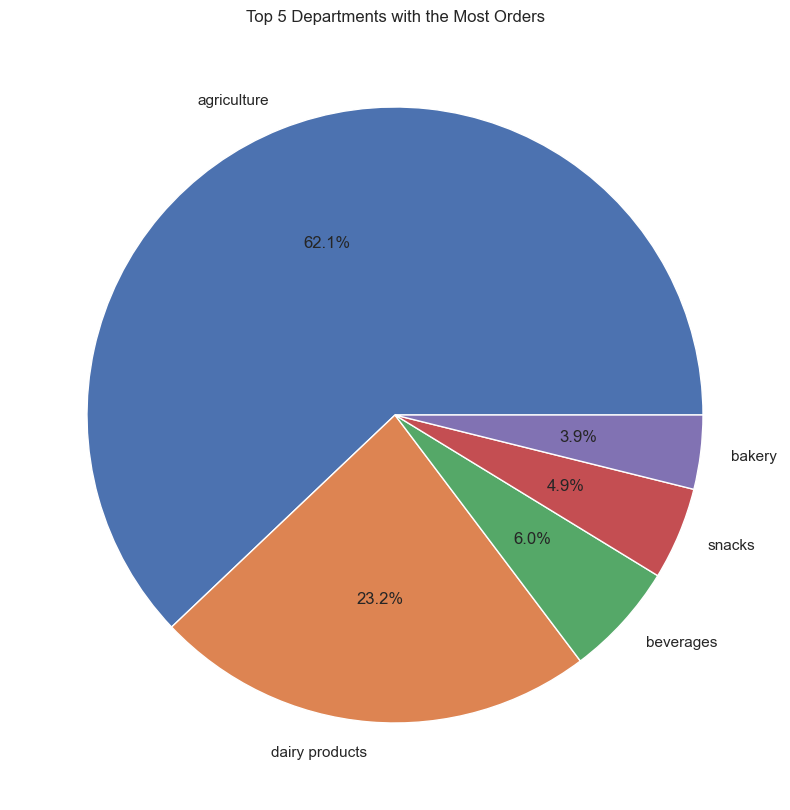

In [14]:
#Plotting the data in a pie chart

plt.figure(figsize=(10,10))
plt.pie(df1_pivot['number_of_orders'], labels=df1_pivot['department_name'], autopct='%1.1f%%')
plt.title('Top 5 Departments with the Most Orders')
plt.show()

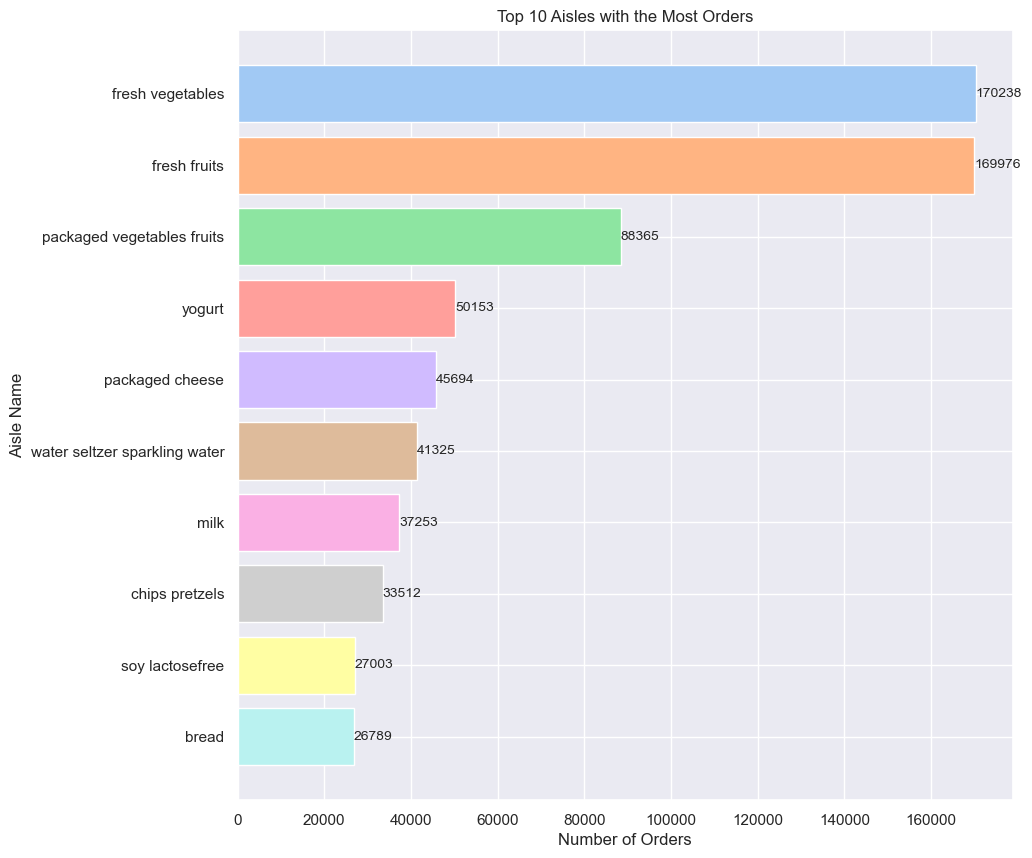

In [20]:
# Sorting in descending order
df1_sorted = df1.sort_values('number_of_orders', ascending=False)

# Create the plot
plt.figure(figsize=(10, 10))
colors = sns.color_palette('pastel')[0:len(df1_sorted)]
bars = plt.barh(df1_sorted['aisle'], df1_sorted['number_of_orders'], color=colors)

# Add labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=10)

# Invert y-axis to have the highest values on top
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Number of Orders')
plt.ylabel('Aisle Name')
plt.title('Top 10 Aisles with the Most Orders')

# Show the plot
plt.show()

## 2. Customers tend to place more orders during the weekend

We analyse the patterns of orders during the week and at which time of the day such occurs. The result will give us more insights on when we can show commercials on the app to increase sales at the best time.

In [28]:
# Visualizing the data

df2_1.head(7)

,day_of_week,number_orders
0,Saturday,40252
1,Sunday,38997
2,Monday,31688
3,Thursday,31050
4,Friday,30565
5,Tuesday,30001
6,Wednesday,29034


In [49]:
# Visualizing the data - Saturday

df2_2.head(24)

# Sorting the hours

df2_2_sorted = df2_2.sort_values('hours', ascending=True)

df2_2_sorted


,hours,number_orders
17,0,250
19,1,157
20,2,87
22,3,71
23,4,45
21,5,86
18,6,234
14,7,810
10,8,1830
8,9,2660


In [50]:
# Visualizing the data - Sunday
 
df2_3.head(24)

# Sorting the hours

df2_3_sorted = df2_3.sort_values('hours', ascending=True)

df2_3_sorted

,hours,number_orders
18,0,231
19,1,137
22,2,60
23,3,57
21,4,66
20,5,101
17,6,342
12,7,1161
9,8,2239
2,9,3327


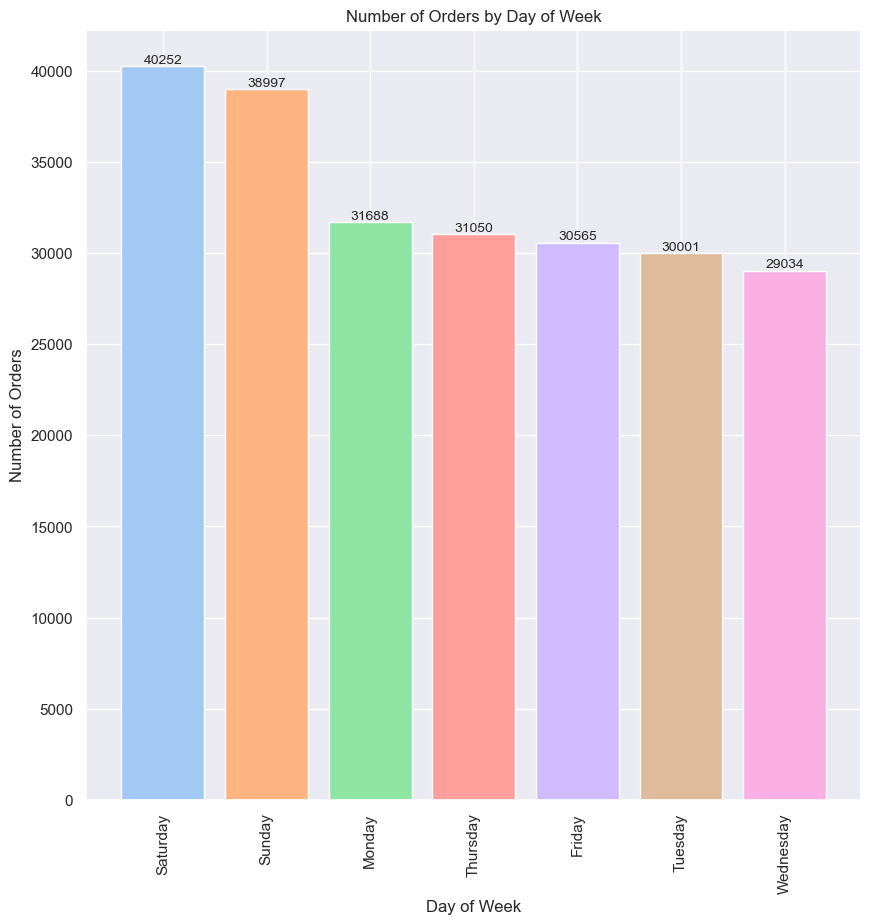

In [32]:
# Ensure the plot size
plt.figure(figsize=(10, 10))

# Assign different colors to each bar
colors = sns.color_palette('pastel')[0:len(df2_1)]

# Create the bar plot
bars = plt.bar(df2_1['day_of_week'], df2_1['number_orders'], color=colors)

# Add labels to the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', 
             ha='center', va='bottom', fontsize=10)

# Rotate x-ticks for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day of Week')

# Show the plot
plt.show()

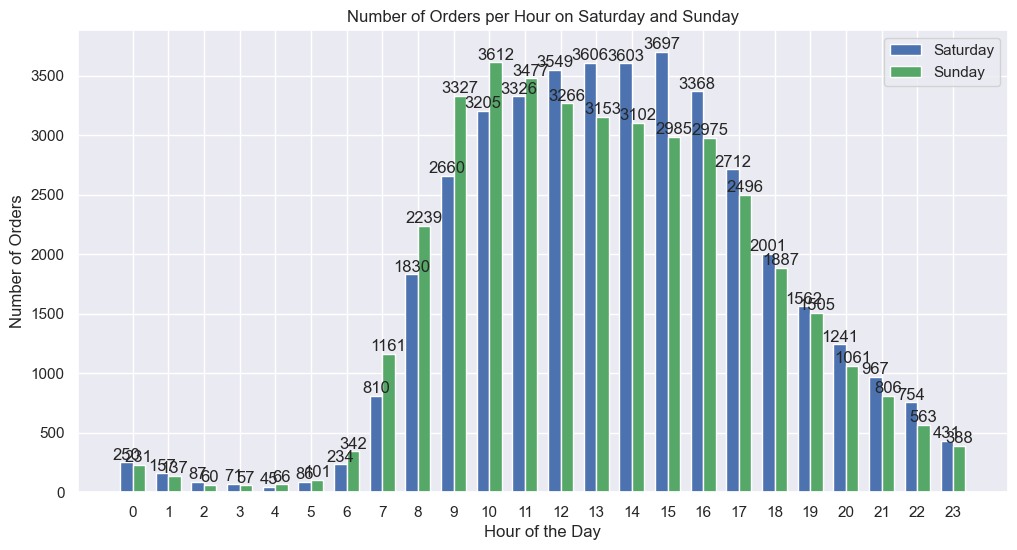

In [52]:
# Merge data into one DataFrame for easier plotting
df_combined = df2_2_sorted.merge(df2_3_sorted, on='hours', suffixes=('_saturday', '_sunday'))

bar_width = 0.35
index = np.arange(len(df_combined))

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(index, df_combined['number_orders_saturday'], bar_width, label='Saturday', color='b')
bar2 = ax.bar(index + bar_width, df_combined['number_orders_sunday'], bar_width, label='Sunday', color='g')

ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Orders')
ax.set_title('Number of Orders per Hour on Saturday and Sunday')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_combined['hours'])
ax.legend()

# Add values on top of bars
for bar in bar1:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', ha='center', va='bottom')
for bar in bar2:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', ha='center', va='bottom')

plt.show()

## 3. Establishing loyalty levels to different type of customers and develop a program to increase customer engagement and order frequency

In this hypothesis, we would like to know the loyalty levels of our customers based on their order frequency. This way we can give a reward to our loyal customers and we can try to think of best approach to increase the loyalty level of other customers. 



In [53]:
# Visualizing the data

df3.sample(10)

,user_id,total_products_ordered,days_since_prior_order
1025,10827,1034,8.2727
203,8747,3402,4.4815
11396,6018,20,30.0000
14714,8329,9,30.0000
5945,11563,90,11.8333
3102,6320,275,11.2273
5065,9793,119,13.5000
7717,5788,54,23.2222
2197,12209,434,12.7143
13216,11877,9,18.3333


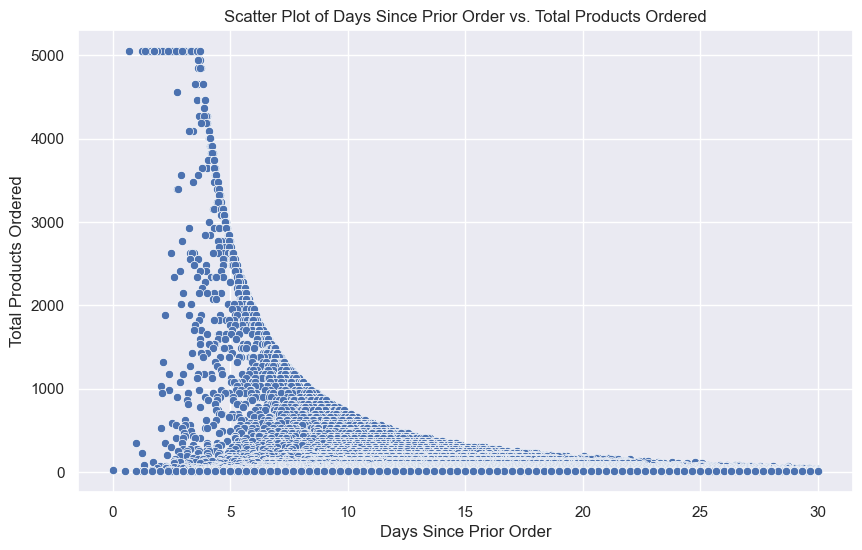

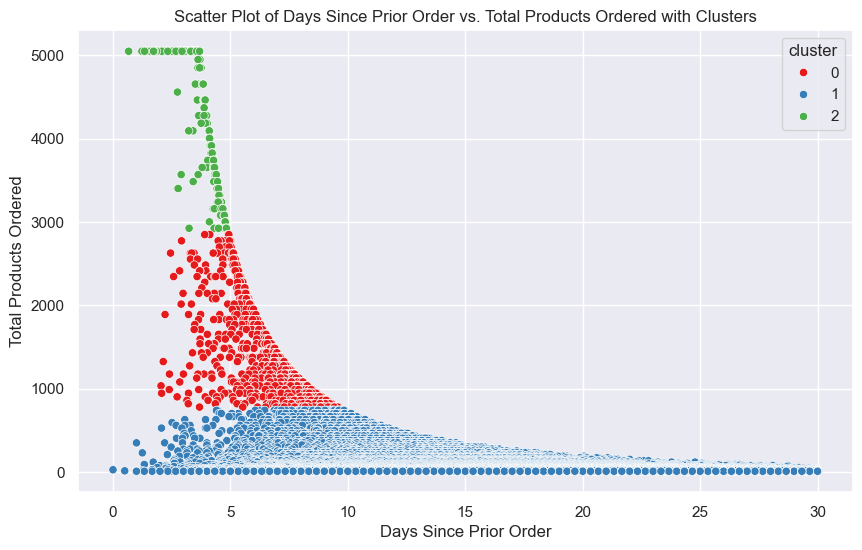

In [59]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='days_since_prior_order', y='total_products_ordered')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Total Products Ordered')
plt.title('Scatter Plot of Days Since Prior Order vs. Total Products Ordered')
plt.show()

# Optional: Clustering
kmeans = KMeans(n_clusters=3)
df3['cluster'] = kmeans.fit_predict(df3[['days_since_prior_order', 'total_products_ordered']])

# Scatter plot with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='days_since_prior_order', y='total_products_ordered', hue='cluster', palette='Set1')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Total Products Ordered')
plt.title('Scatter Plot of Days Since Prior Order vs. Total Products Ordered with Clusters')
plt.show()

In [60]:
df3.describe()

,user_id,total_products_ordered,days_since_prior_order,cluster
count,14904.000000,14904.000000,14904.000000,14904.000000
mean,7452.500000,282.673376,15.390641,0.937869
std,4302.558541,667.347635,6.899865,0.301027
min,1.000000,9.000000,0.000000,0.000000
25%,3726.750000,20.000000,9.818200,1.000000
50%,7452.500000,54.000000,14.833300,1.000000
75%,11178.250000,209.000000,20.600000,1.000000
max,14904.000000,5049.000000,30.000000,2.000000


In [62]:
# Eliminating outliers

# Identify outliers using the IQR method
Q1 = df3[['total_products_ordered', 'days_since_prior_order']].quantile(0.25)
Q3 = df3[['total_products_ordered', 'days_since_prior_order']].quantile(0.75)
IQR = Q3 - Q1

IQR

total_products_ordered    189.0000
days_since_prior_order     10.7818
dtype: float64

In [65]:
# Define a filter to remove outliers

filter = (df3[['total_products_ordered', 'days_since_prior_order']] >= (Q1 - 1.5 * IQR)) & (df3[['total_products_ordered', 'days_since_prior_order']] <= (Q3 + 1.5 * IQR))
df_filtered = df3[filter.all(axis=1)]

df_filtered.describe()

,user_id,total_products_ordered,days_since_prior_order,cluster
count,12815.000000,12815.000000,12815.000000,12815.0
mean,7446.285135,87.866641,16.724936,1.0
std,4310.756859,104.163811,6.463960,0.0
min,1.000000,9.000000,0.000000,1.0
25%,3701.500000,20.000000,11.857100,1.0
50%,7466.000000,44.000000,16.333300,1.0
75%,11176.000000,119.000000,21.571400,1.0
max,14904.000000,464.000000,30.000000,1.0


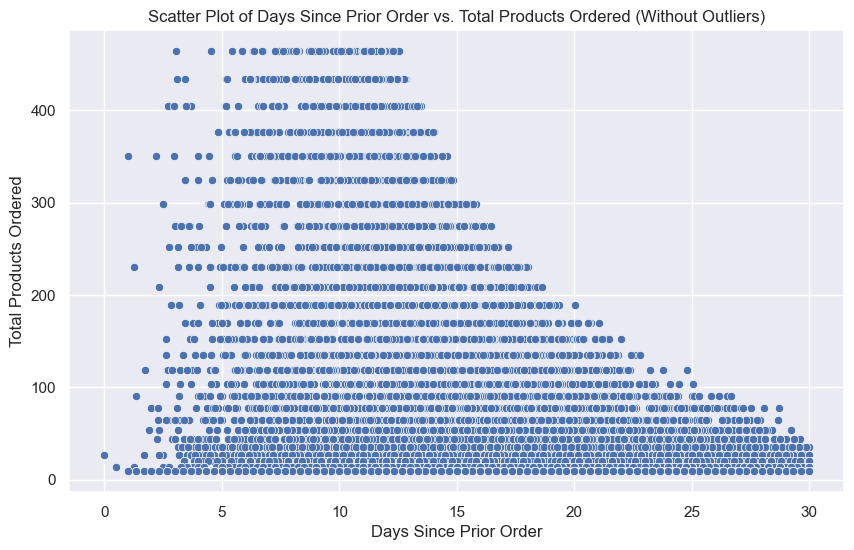

/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_5697/1351012722.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster'] = kmeans.fit_predict(df_filtered[['days_since_prior_order', 'total_products_ordered']])


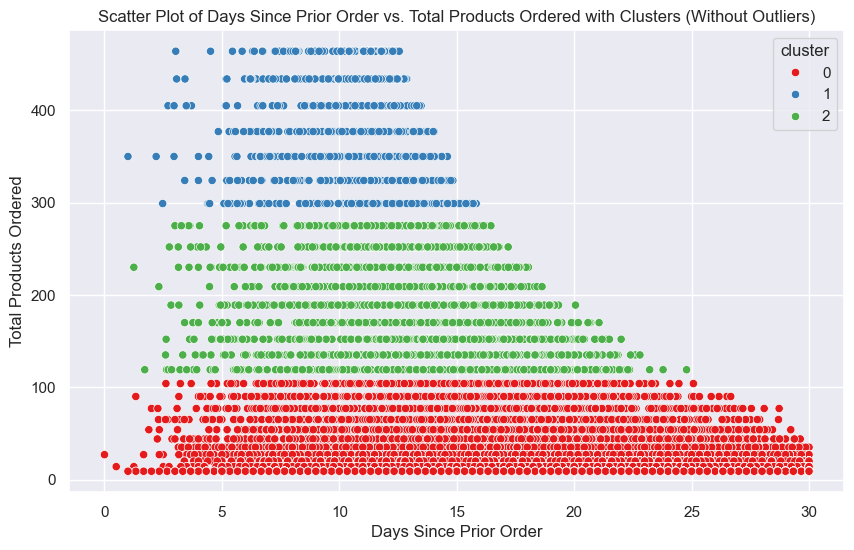

In [66]:
# Create a scatter plot without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='days_since_prior_order', y='total_products_ordered')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Total Products Ordered')
plt.title('Scatter Plot of Days Since Prior Order vs. Total Products Ordered (Without Outliers)')
plt.show()

# Optional: Clustering without outliers
kmeans = KMeans(n_clusters=3)
df_filtered['cluster'] = kmeans.fit_predict(df_filtered[['days_since_prior_order', 'total_products_ordered']])

# Scatter plot with clusters without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='days_since_prior_order', y='total_products_ordered', hue='cluster', palette='Set1')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Total Products Ordered')
plt.title('Scatter Plot of Days Since Prior Order vs. Total Products Ordered with Clusters (Without Outliers)')
plt.show()

In [67]:
# See the dimension of each cluster

df_filtered['cluster'].value_counts()


cluster
0    9496
2    2343
1     976
Name: count, dtype: int64